# Trump - a 140 character insight

---

## Initial research outline

As presidents lead their nation, we believe their actions could set an example and influence and encourage certain behaviors. We will investigate if there is a possible correlation between sentiment conveyed by such figures via social media and negative social behavior of a nation.

The presidency of Donald Trump has been marked with many controversies, including the rise of supremacist groups and numerous nation wide conflicts. By using Trump tweets, we would explore if there is a significant temporal correlation between sentiment expressed in the Tweet and the number of conflicts in the nation using GDELT dataset. To reduce the bias of such analysis, we would perform the same analysis with social media activity of his predecessor and compare the results, as well as adding the social-economic aspects which may affect such behaviors.

What is the power of a presidential tweet? We hope that we will have more insight on the answer of this question and raise awareness on the impact 140 characters can make.

### Research questions
* Do violent events or crimes occur more frequently after presidential tweets?
* Is the correlation higher with negative sentiment of the tweet?
* Does a significant difference exists between such correlation with Trump and Obama presidency?
* Is there a difference in sentiment expressed in tweets before and after Trump becoming a presidential candidate?
* How do social-economical aspects influence the correlation?
* Does the political regiment affect such negative behavior on a larger scale?

### Dataset

#### Trump tweets
* Downloading the complete dataset locally and processing the JSON files
* We would use mainly the timestamps and tweet content for our analysis:
  * timestamps for temporal correlation with events
  * tweet content for sentiment analysis
* We could follow the impact of tweet by analyzing:
  * number of retweets
  * number of favorites
  * number of followers
  
#### GDELT
* We would use GDELT Global Knowledge graph to gain insights on events:
  * geolocalized to USA
  * in specified timeframe, starting from 2013
  * specific events, such as protests or violent manifestations
  * will need knowledge on working on the cluster and accessing the data
  
#### Wikidata
* Obtaining data for social-economical indicators:
  * for a specific period of time
  * for a specific region of the USA
  * data wrangling and processing

#### Obama tweets *
Available at: http://obamawhitehouse.gov.archivesocial.com/

* It would enrich our analysis by providing an insight in differences between the two leaders
* We strive for a more complete and less biased analysis

---

## Evolution of research topic

The initial project proposal has evolved through iterations of data exploration, evaluation of project complexity and consultation with the teaching team in ADA.

### Main concerns that have been raised
* project required many areas of expertise
    * from social studies, behavioral studies, to mechanisms of USA economy
    * unable to reach the level of expertise on our own
    * for this type of project having external scientists would be an overkill
* timeframe for this project is limited
    * practically impossible to have a meaningful insight in about a month
* **signal detection and correlation would be very hard to prove since many underlying factors exist - complexity is high**
* GDELT could not provide the necessary granularity for this survey

A comment that described our situation and prospect of success:
> You will probably need a PhD to be able to come close to a meaningful result.

Even though we were passionate about our idea, we have realized we need to reduce the scope and pinpoint specific research questions that are feasible with our current expertise and available time. We are thankful to very insightful comments from professor Bob West who steered us to our current project. The project is reasonable, it is possibly insightful and we hope to squeeze as much information from the dataset as possible.

---

# TODO: current outline, abstract, research questions and datasets

# Data analysis

---

## General overview

We will perform an exploratory data analysis to get a deeper insight on the available data and information within. The two datasets we have decided on using are:

* Trump Twitter archive: *main dataset*
* Internet archive - Trump TV news factchecks: *enrichment dataset*


### Trump Twitter archive

Trump Twitter archive represents the complete collection of Tweets from the account of Donald Trump, since the first Tweet in 2009. The dataset has been obtained from [Trump Twitter Archive github repository](https://github.com/bpb27/trump_tweet_data_archive).

Internally, the dataset has been obtained by combining [Twitter scraper](https://github.com/bpb27/twitter_scraping) and official Twitter API. This combination would allow for scraping Tweets from any user account without a need to use the official premium Twitter API.

The result set is compliant with Twitter API output and information on meaning of columns in our dataset can be obtained by looking into [official documentation](https://developer.twitter.com/en/docs/tweets/tweet-updates).

More information and explorative data analysis will follow.

### Internet archive - Trump TV news factchecks

In further research we would like to have an insight how Donald Trump reacts to the news about him. Obtaining a dataset which collected the news about Donald Trump would be difficult because:
* Many sources online - which outlets to select
* Possible bias while covering significant portion of news
* Duplication of news from different sources
* Significant difference in time of publishing
* There is a need to extract main topics of news
* What is the criteria for marking the news are about Donald Trump - he will appear in many news stories!
* No universal API or method for this task - scraping of multiple sites would be necessary

Luckily, [The Internet Archive](https://archive.org/details/tv?factchecks) has a ready dataset combining televised news clips linked to Donald Trump, from 2009 until today. Most importantly for televised clips - the dates are present, as well as a short list of topics covered. This would make it easier to pinpoint the reaction, if there is any in the Tweets. 

More information about the dataset will follow in the exploratory data analysis.


### Where to process: in cluster or locally?
Both **Trump Twitter archive** and **Internet archive - Trump TV news factchecks** are small enough for a local, in-memory processing and analysis. Decisive characteristics of the datasets for a local, in-memory processing are:

* Trump Twitter archive:
    * multiple JSON files, split by the year of collection
    * content of the JSON files is specified by Twitter API
    * 9 uncondensed JSON files, in total less than 100MB (92MB)

* Internet archive - Trump TV news factchecks
    * single CSV file
    * less than 1 MB in size
    
---

## Exploratory data analysis

We will look in depth into the datasets and show the possible uses of the information, as well as comments on usability of certain parts of our data.

Since dataset size allows for working in-memory, we will use standard utilities such as *Pandas* and *Numpy*, as well as standard utilities for graph and chart visualization.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
TWEETS_PATH = 'C:/Users/Viktor/Desktop/trump_tweet_data_archive-master/trump_tweet_data_archive-master/master_' 
NEWS_PATH = 'data/factchecks.csv'

### Trump Twitter Archive

We combine all the present Tweets into a single `DataFrame` for an easier utilization. Since multiple dataframes are concatenated, we need to reset the index to obtain an unique index.

In [3]:
tweets = pd.DataFrame()

for i in range(2009,2018):
    tweets = tweets.append(pd.read_json(TWEETS_PATH+str(i)+'.json/master_'+str(i)+'.json'))
    
tweets.reset_index(inplace=True)

As well as observing all the present columns in our `DataFrame`:

In [4]:
tweets.columns

Index(['index', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'favorite_count',
       'favorited', 'full_text', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'scopes', 'source', 'text', 'truncated', 'user',
       'withheld_copyright', 'withheld_in_countries', 'withheld_scope'],
      dtype='object')

Documentation provides more information about the semantics behind each attribute of a [Tweet object](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).

We are mainly interested in following general attributes of Tweets:
* **textual content**
* **number of retweets**
* **number of favorites**

Such Tweet context could be obtained from the fields:
* `text` - Tweet content
* `created_at` - timestamp of the tweet
* `entities` - *dictionary*, [entities](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/entities-object) parsed out of the tweet:
    * `hashtags` - list of included hashtags
    * `symbols` - list of symbols
    * `urls` - list of urls
    * `user_mentions` - list of mentioned users
* `favorite_count` - number of favorites
* `id` - Tweet id
* `is_quote_status` - indicates whether this is a quoted tweet - indicates that this is not a direct expression of the user
* `lang` - language of the tweet (could help in the NLP)
* `retweet_count` - number of retweets
* `source` - utility used to post the Tweet
* `user` - *dictionary*, information about the [user](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object), we are interested in:
    * `followers count` - number of followers at the Tweet `created_at` time
    * `statuses_count` - number of tweets at the Tweet `created_at` time

---

**Sample Tweet:**

In [5]:
tweets.head(2)

,index,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,retweeted,retweeted_status,scopes,source,text,truncated,user,withheld_copyright,withheld_in_countries,withheld_scope
0,0,NaN,NaN,2009-12-23 17:38:18,NaN,"{'symbols': [], 'user_mentions': [], 'hashtags...",NaN,12,False,NaN,...,False,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",From Donald Trump: Wishing everyone a wonderfu...,False,"{'follow_request_sent': False, 'has_extended_p...",NaN,NaN,NaN
1,1,NaN,NaN,2009-12-03 19:39:09,NaN,"{'symbols': [], 'user_mentions': [], 'hashtags...",NaN,6,False,NaN,...,False,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Trump International Tower in Chicago ranked 6t...,False,"{'follow_request_sent': False, 'has_extended_p...",NaN,NaN,NaN


**Sample `entities` dictionary**:

In [6]:
tweets.loc[0].entities

{'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}

**Sample `user` dictionary:**

In [7]:
tweets.loc[0].user

{'contributors_enabled': False,
 'created_at': 'Wed Mar 18 13:46:38 +0000 2009',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'President-elect of the United States',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'DonaldJTrump.com',
     'expanded_url': 'http://www.DonaldJTrump.com',
     'indices': [0, 23],
     'url': 'https://t.co/mZB2hymxC9'}]}},
 'favourites_count': 45,
 'follow_request_sent': False,
 'followers_count': 15665560,
 'following': True,
 'friends_count': 41,
 'geo_enabled': True,
 'has_extended_profile': False,
 'id': 25073877,
 'id_str': '25073877',
 'is_translation_enabled': True,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 45212,
 'location': 'New York, NY',
 'name': 'Donald J. Trump',
 'notifications': True,
 'profile_background_color': '6D5C18',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg',
 'profile_background_

We see many fields generated by the API, but as we have previously mentioned, we will use only a subset of such features for our analysis.

---

#### General characteristics of the dataset

In [8]:
print('Number of Tweets: ', tweets.shape[0])
print('Account created on: ', tweets.loc[0].user['created_at'])
print('User time zone:', tweets.loc[0].user['time_zone'])
print('Latest tweet time:', tweets.created_at.max())

Number of Tweets:  32532
Account created on:  Wed Mar 18 13:46:38 +0000 2009
User time zone: Eastern Time (US & Canada)
Latest tweet time: 2017-11-24 18:49:12


In [9]:
tweets.describe()

,index,contributors,favorite_count,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,quoted_status_id,quoted_status_id_str,retweet_count,withheld_copyright
count,32532.000000,0.0,32532.000000,3.253200e+04,3.253200e+04,1.999000e+03,1.999000e+03,2.440000e+03,2.440000e+03,7489.0,2.860000e+02,2.860000e+02,32532.000000,1.0
mean,2965.614134,NaN,8414.287809,5.031478e+17,5.031478e+17,3.347165e+17,3.347165e+17,3.516381e+08,3.516381e+08,0.0,7.254326e+17,7.254326e+17,2572.550012,1.0
std,2112.973211,NaN,25144.002721,2.027952e+17,2.027952e+17,9.525507e+16,9.525507e+16,4.004455e+08,4.004455e+08,0.0,1.097156e+17,1.097156e+17,7422.315792,NaN
min,0.000000,NaN,0.000000,1.698309e+09,1.698309e+09,1.672774e+17,1.672774e+17,7.425000e+03,7.425000e+03,0.0,5.427798e+17,5.427798e+17,0.000000,1.0
25%,1193.000000,NaN,20.000000,3.350412e+17,3.350412e+17,2.937718e+17,2.937718e+17,4.251961e+07,4.251961e+07,0.0,6.293375e+17,6.293375e+17,16.000000,1.0
50%,2590.000000,NaN,68.000000,5.097998e+17,5.097998e+17,3.138054e+17,3.138054e+17,2.392729e+08,2.392729e+08,0.0,6.973068e+17,6.973068e+17,107.000000,1.0
75%,4443.000000,NaN,1910.000000,6.551359e+17,6.551359e+17,3.543118e+17,3.543118e+17,4.852951e+08,4.852951e+08,0.0,7.888950e+17,7.888950e+17,1151.250000,1.0
max,8143.000000,NaN,633253.000000,9.341318e+17,9.341318e+17,9.336626e+17,9.336626e+17,3.412873e+09,3.412873e+09,0.0,9.339594e+17,9.339594e+17,369530.000000,1.0


Donald Trump has had his Twitter account created on 18th of March, 2009. Since then he has Tweeted over 32532 times. We have taken a snippet of the dataset on 24th of November 2017 to work with locally. Latest tweet is posted on 18:49:12 that day, in Eastern time zone.

The dataset is being updated hourly with new tweets. After obtaining a stable tool for analysis and insight, it would be possible to perform an hourly update. Albeit, such miniscule changes in comparison to the total body of tweets would be insignificant for some analysis. 

As seen in the `DataFrame` description, across all the Tweets we can observe their overall coarse popularity:
* favorites: 
    * maximum: 633253
    * mean: 8414
    * median: 68
* retweets:
    * maximum: 369530 
    * mean: 2572
    * median: 107
    
We will look into greater detail about Tweet distribution over the years, their characteristics and stats in later phases of dedicated data analysis.

#### Geolocation - is there a value in it?

Twitter API provides geographical coordinates of the tweet, provided the user has enabled such an option. This could provide some insight on activities of any person using Twitter. In this case it could provide an option to see whether the tone of the Tweets and general topics differ when Donald Trump is in different locations: foreign countries, Oval office or resting at Mar-a-Lago.

As presumed, only certain number of Tweet is geotagged. This makes sense - since otherwise Secret Service might have a more difficult job in certain situations. Albeit, we can get a small glimpse of locations Donald Trump has visited, as we will demonstrate in a short example:

In [10]:
# we extract the tweets for which the geolocation is defined
coord = tweets.loc[tweets.coordinates.notnull()]['coordinates']
coord.shape

(2299,)

We will use `Folium` to show a map and place markers on locations Donald Trump has tweeted from.

In [11]:
import folium

m = folium.Map(location=[40.7624658, -73.9754123], zoom_start=2)

Since there are too many Tweets (2299) to visualize on a map, we presume that some have similar coordinates - we only want a general location. Thus we define functions to generalize the location and reduce the size of a list by merging similar coordinates together:

In [12]:
'''
Convenience function wrapper for reversing a list.

Parameters: 
my_list -- input list to reverse

Returns:
my_list -- list with reversed elements
'''
def my_reverse(my_list):
    my_list.reverse()
    return my_list

'''
Function for verifying whether a sublist exists in a list of lists.

Parameters:
my_list -- list of lists
check -- list, input for which to check existence in my_list

Returns:
boolean -- True if sublist does not exist in the list, False otherwise
'''
def not_in_list(my_list, check):
    for lst in my_list:
        if(np.array_equal(check, lst)):
            return False
    return True

'''
Function for removing similar coordinates from the coordinates iterable object. 
The similarity is defined by decimal precision - the higher the decimal it is more precise and less entries would be removed.

Parameters:
coord_list -- iterable object containing coordinates (pandas.Series object)
decimal -- the rounding precision to be applied

Returns:
np.array -- array with removed similar coordinates
'''
def remove_similar_coord(coord_list, decimal):
    cleaned = [[0.53242,  0.43315]]
    
    for el in coord_list:
        rounded = np.around(el['coordinates'],decimal)
        if (not_in_list(cleaned, rounded)):
            cleaned.append(rounded)
    
    return np.array(cleaned)

In [13]:
cleaned = remove_similar_coord(coord, 2)
cleaned.shape

(78, 2)

In comparison to 2299 markers, 78 markers would be more reasonable to plot on map. Only thing we did was generalizing Tweets that were posted from nearby locations. We will add the markers to the map, note that we need to reverse the coordinates provided in Twitter API (reverse the position of lattitude and longitude) to show the right location.

In [14]:
for el in cleaned:
    folium.Marker(location=np.flip(el, axis=0)).add_to(m)
    
m

Besides visualization, we can't reason much in terms of automated analysis from the map. One option would be to extract the location details from the coordinates, and then extract the required infomation (e.g. country name). This is possible by utilizing [`geopy` package](https://pypi.python.org/pypi/geopy), more specifically [`Nominatim`](http://wiki.openstreetmap.org/wiki/Nominatim), which represents a Python wrapper of the Nominatium API. We will showcase the example of extracting the country names from the previously visualized markers.

In [15]:
from geopy.geocoders import Nominatim

# we initialize the object - wrapper around Nominatim API
geolocator = Nominatim()

A short example on how to obtain the Location object and address:

In [16]:
# location is obtained by using the reverse method, and providing the coordinates
l = geolocator.reverse([40.7625069, -73.975321])

# address represents a field of the Location object, we see the country is last element separated by comma
l.address

'712 Fifth Avenue, 712, 5th Avenue, Diamond District, Manhattan Community Board 5, New York County, NYC, New York, 10019, United States of America'

In [17]:
cleaned.shape

(78, 2)

In [18]:
import time

countries_tweeted_from = []

for crd in cleaned:
    # some coordinates seem to be spoofed and are less than 1
    if(crd[0]>1 or crd[1]>1):
        # we flip the coordinate array and convert it to Python list
        coord_list = np.flip(crd, axis=0).tolist()
        
        # we get the Location object from coordinates
        location = geolocator.reverse(coord_list)
        
        # we split the address by comma character
        address = location.address.split(',')
        
        # the country represents the last element in the address list
        country = address[len(address)-1]
        
        # we append the extracted country to the list
        countries_tweeted_from.append(country)

We can now see the countries Donald Trump has Tweeted from:

In [19]:
set(countries_tweeted_from)

{' Hrvatska', ' India', ' Ireland', ' UK', ' United States of America', ' РФ'}

**Note:** for the current scope of our analysis and general project, this does not represent much value. It is here to showcase the possibility in certain use-cases for use with geo-spatial data (either encoded as coordinates, or address).

---

#### Number of followers over time 

We want to see what the data could provide us about the number of followers over time.

In [43]:
def plot_followers(tweets):
    x = []
    y = []
    
    tmp = tweets.sort_values(by='created_at', ascending=True)
    
    # iterate through tweets and fetch date of creation and current number of followers
    for ind, row in tmp.iterrows():
        x.append(row['created_at'])
        y.append(row.user['followers_count'])
        
    plt.figure(figsize=(15,15))
    plt.plot(x,y)

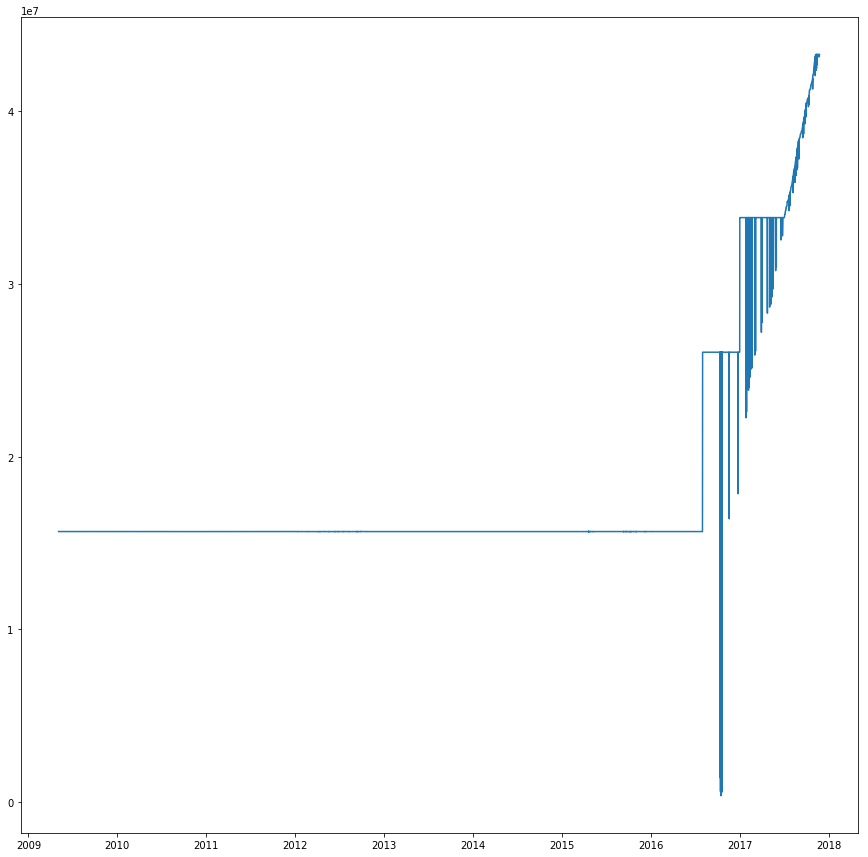

In [42]:
plot_followers(tweets)

We can notice many discrepancies in the provided data. One reason might be that the API used for data collection might have changed, and without using an official Twitter API - the data may be flawed. This would explain the very volatile behavior of the datapoints, as well as long stagnation prior to mid-2016.

The baseline can be seen [here](https://www.trackalytics.com/twitter/followers/widget/realdonaldtrump/). General outline of data from 2017 could correspond to the real data, but with many flaws it is not advised to use the number of followers as a raw number provided in the **Trump Twitter Archive**.

We will show a glimpse of number of followers in data from mid-2016 until today:

In [46]:
def plot_followers_from(tweets, from_date):
    x = []
    y = []

    tmp = tweets.loc[tweets.created_at>pd.Timestamp(from_date)]
    tmp.sort_values(by='created_at', ascending=True, inplace=True)
    
    # iterate through tweets and fetch date of creation and current number of followers
    for ind, row in tmp.iterrows():
        x.append(row['created_at'])
        y.append(row.user['followers_count'])
        
    plt.figure(figsize=(15,15))
    plt.plot(x,y)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


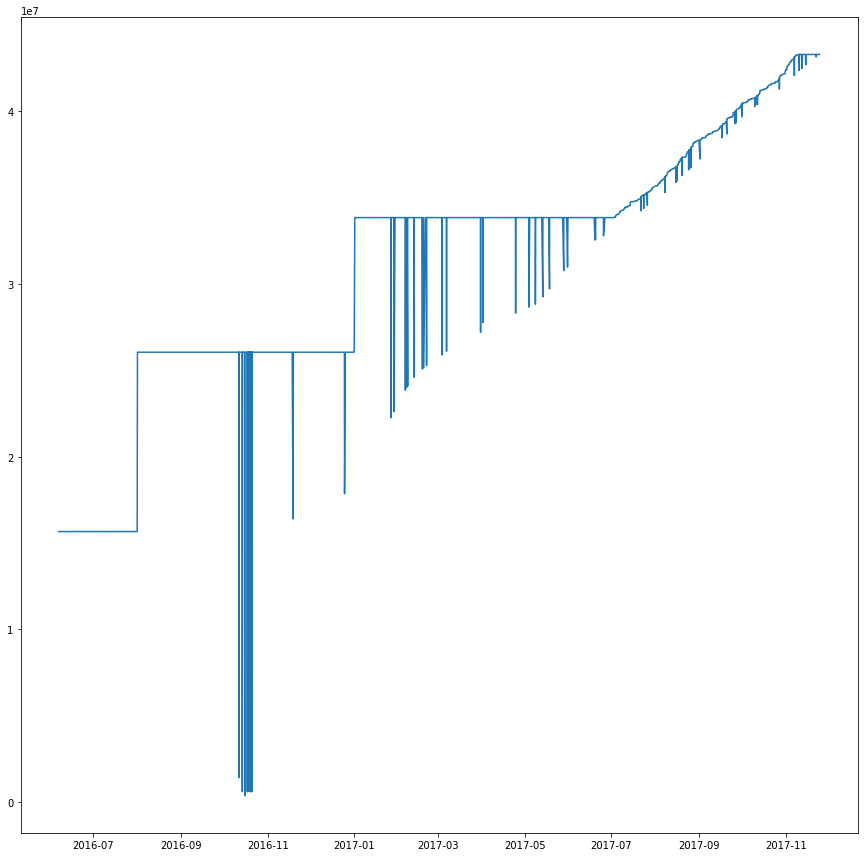

In [47]:
plot_followers_from(tweets, '2016-06-06')

We can see the previously mentioned volatility and sudden increase and decrease of followers, being less prominent from mid-2017. As mentioned, this can be a flaw in the data collection.

We can try to average the number of followers over certain periods, such as months to see whether that will reduce volatility.

In [61]:
def plot_avg_followers_from(tweets, from_date):
    x = []
    y = []

    tmp = tweets.loc[tweets.created_at>pd.Timestamp(from_date)]
    tmp.sort_values(by='created_at', ascending=True, inplace=True)
    
    # iterate through tweets and fetch date of creation and current number of followers
    for ind, row in tmp.iterrows():
        x.append(row['created_at'])
        y.append(row.user['followers_count'])
    
    avg_x = []
    avg_y = []
    cum = 0
    cnt = 0
    for ind, date in enumerate(x):
        if(cum==0):
            cum += y[ind]
            cnt += 1
        else:
            if(x[ind-1].month==x[ind].month):
                cum += y[ind]
                cnt += 1
            else:
                avg_x.append(x[ind-1])
                avg_y.append(cum/cnt)
                cum = 0 
                cnt = 0
    
    plt.figure(figsize=(15,8))
    plt.plot(avg_x,avg_y)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


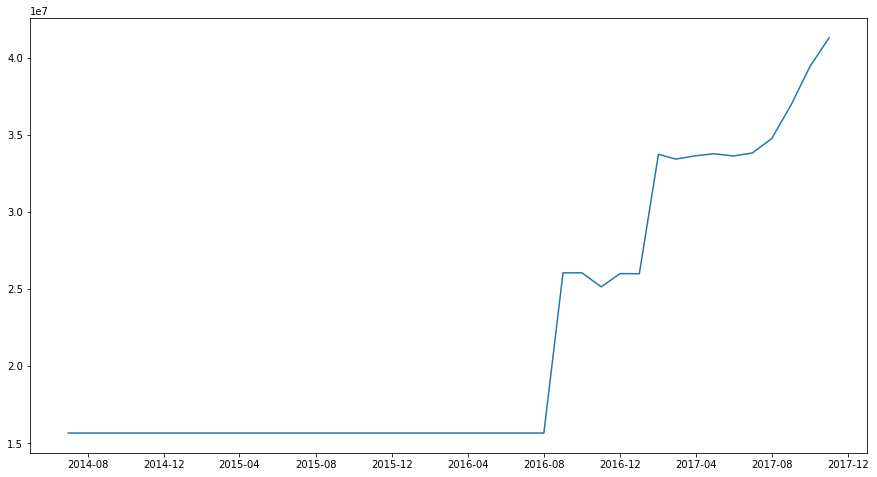

In [63]:
plot_avg_followers_from(tweets, '2014-06-06')

This has significantly reduced the discrepancy, and looks more like the baseline.

**Conclusion**: Using the number of followers from the datasets has caveats:
* it is very volatile per-tweet most probably caused by API inconsistencies
* the behavior becomes more similar to the baseline when averaging out over period

In terms of using the Tweets to determine whether they have influenced the number of new followers or people un

### Internet archive - Trump TV news factchecks

In this section we will shortly describe the available data in the Internet archive - Trump TV news factchecks. Firstly, we will load the dataset, which we obtained as a CSV file. As described in the [documentation](https://archive.org/details/tv?factchecks), this is a rather simple dataset in structure, but with immense value in data. This dataset combines news reports on several persons in Trump administration to have a better overview of news.

The dataset has been obtained on 24.11.2017. 

In [22]:
news = pd.read_csv(NEWS_PATH)

news['Date of Airing (EST)'] = pd.to_datetime(news['Date of Airing (EST)'])

news.head()

,Date of Airing (EST),Topic List,Fact Check,TV Clip,Organization,Collection
0,2017-11-19,Taxes,http://www.politifact.com/truth-o-meter/statem...,https://archive.org/details/FOXNEWSW_20171119_...,PolitiFact,steve_mnuchin_archive
1,2017-11-16,"Taxes,Health Care",https://www.washingtonpost.com/news/fact-check...,https://archive.org/details/CSPAN2_20171116_10...,Washington Post,charles_schumer_archive
2,2017-11-14,"Health Care,Taxes",http://www.factcheck.org/2017/11/democrats-ina...,https://archive.org/details/CSPAN2_20171114_15...,FactCheck.org,charles_schumer_archive
3,2017-11-07,Guns,http://www.politifact.com/truth-o-meter/statem...,https://archive.org/details/CSPAN2_20171107_17...,PolitiFact,trumparchive
4,2017-11-06,Taxes,https://www.washingtonpost.com/news/fact-check...,https://archive.org/details/FOXNEWSW_20171107_...,Washington Post,paul_ryan_archive


We can observe 6 columns in this dataset:
* `Date of Airng (EST)` - the date of airing of specified clip, Eastern time
* `Topic List` - the list of general topics appearing in the clip
* `Fact Check` - the link to the fact check
* `TV Clip` - link of the news report clip
* `Organization` - organization which performed the fact check
* `Collection` - from which collection the clip comes from, represents the person from Trump administration

In [23]:
print('Number of clips:', news.shape[0])
print('Earliest date of airing:', news['Date of Airing (EST)'].min())

Number of clips: 1404
Earliest date of airing: 2009-09-18 00:00:00


We have a significant number (1404) of news coverages, along with general topics, going back as early as September 2009. 

**The time is Eastern Time, which coincides with the time zone setting for the Tweets of Donald Trump.**

#### Purpose of the dataset

Since we have date of airing and general topic of the news, we can analyze how Donald Trump reacts to news:
* his direct reaction
* his twitter interaction prior/after the airing
* does he mention certain people or topics at the time of some controversies

To get a general feeling about the topics, we will extract them from the dataset.

In [24]:
# we get the topic list column
topics = news['Topic List']

# we replace the NA values with ''
topics.fillna(value='', inplace=True)

If multiple topics are covered, they are represented as strings, delimited by comma `','`:

In [25]:
topics[2]

'Health Care,Taxes'

In [26]:
'''
Function for extracting unique topics from the topic interable object (pandas.Series).

Parameters:
topics -- iterable object containing topics

Returns:
set -- set of topics appearing in the dataset
'''
def extract_unique_topics(topics):
    container = []
    
    for topic in topics:
        tmp = topic.split(',')
        container.extend(tmp)

    return set(container)

In [27]:
s = extract_unique_topics(topics)

In [28]:
print('Number of topics: ', len(s))
print('Topics:', s)

Number of topics:  277
Topics: {'', 'Paris Agreement', 'Poverty', 'NATO', 'Uranium', 'NAFTA', 'Privacy', 'Unemployment rate', 'Workers', 'Infrastructure', 'Government Regulation', 'Miscellaneous', 'Racism', 'Regulations', 'Islamic Extremism', 'Regulation', 'Retirement', 'Sanctions', 'Presidential Appointments', 'Deficit', 'National Intelligence', 'Obama Birth Certificate', 'Offshoring', 'Government regulation', 'Oil Imports', 'North Korea', 'Campaign', 'Economy', 'Campaign Protests', 'Manufacturing', 'Disability', 'Wages', 'Health', 'Fundraising', 'Income', 'Trade deficit', 'Electability', 'Wind', 'TV Ads', 'Moratorium', 'Iran', 'Israel', 'State of the Union', 'Food', 'Job Creation', 'India', 'Health Care', 'Visas', '. Noncitizen voting', 'Government Spening', 'Benghazi', 'Congressiaonal Rules', 'Energy', 'Bipartisanship', 'Human Rights', 'Transparency', 'Yemen', 'Safety', 'Unemployment Rate', 'Public Safety', 'Sports', 'War', 'Chemical Weapons', 'History', 'Financial Regulation', 'Cit

We observe a variety of topics:
* about 270 different topics
* some of the topics contain typos
* it is a good basis for future NLP - since content of the news is summaized

#### Trump administration topics:

With this dataset we can show the main topics covered by news outlets on the Trump administration. 

This can be especially interesting in terms of extracting the most prominent topics in certain years or specified time period.

In [29]:
def count_occurence(topic_name, topics):
    count = 0
    
    for topic in topics:
        tmp = topic.split(',')
        if(topic_name in tmp):
            count += 1

    return count

def get_occurence(topics_set, topics_series):
    occurences = {}
    
    for topic in topics_set:
        occurences[topic] = count_occurence(topic, topics_series)
        
    return occurences
        

In [30]:
occurences = get_occurence(s, topics)

In [31]:
topic_series = pd.Series(occurences)
topic_df = pd.DataFrame(topic_series)

topic_df.reset_index(inplace=True)
topic_df.columns = ['topic','count']

In [32]:
topic_df_sorted = topic_df.sort_values(by='count', ascending=False)

top_50 = topic_df_sorted[0:50]

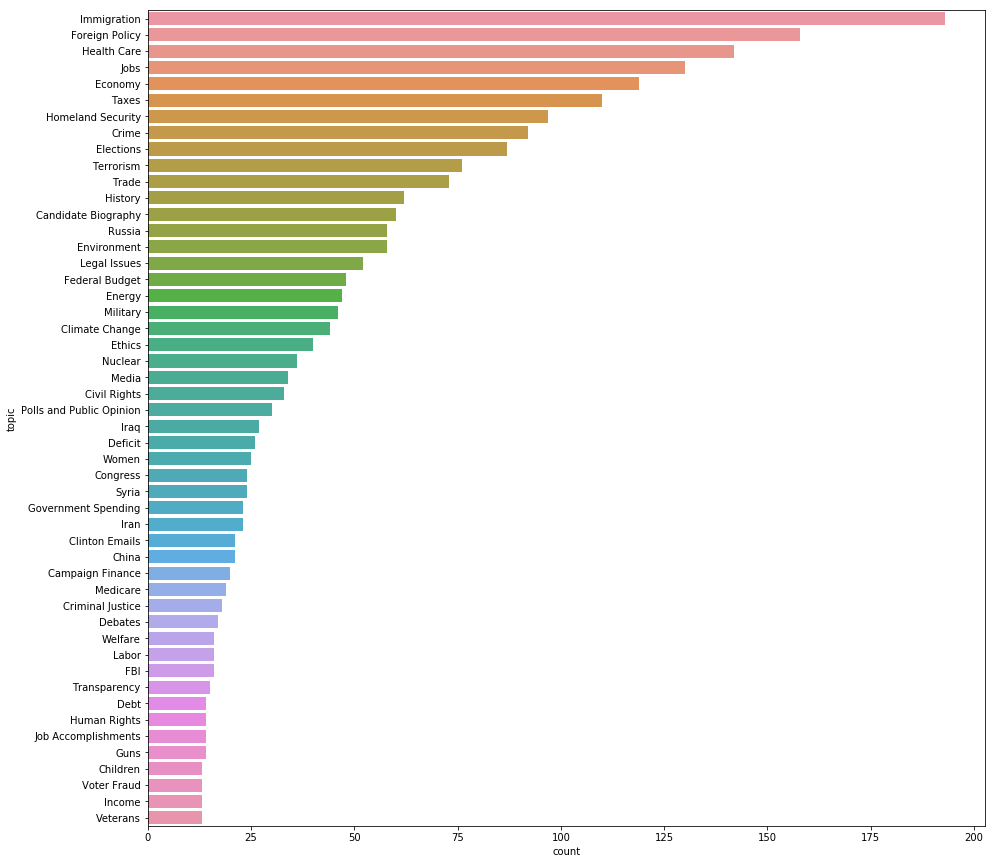

In [33]:
plt.figure(figsize=(15,15))

sns.barplot(data=top_50, x='count', y='topic')
#plt.show()

In [34]:
def get_topics_in_period(news_df, start_date, end_date):
    # we filter the dataframe by dates
    news_copy = news_df.copy()
    news = news_copy.loc[(news_df['Date of Airing (EST)']>=pd.Timestamp(start_date)) &
                       (news_df['Date of Airing (EST)']<=pd.Timestamp(end_date))]
    
    # we get the topic list column
    topics = news['Topic List']

    # we replace the NA values with ''
    topics.fillna(value='', inplace=True)
    
    s = extract_unique_topics(topics)
    
    occurences = get_occurence(s, topics)
    
    topic_series = pd.Series(occurences)
    topic_df = pd.DataFrame(topic_series)

    topic_df.reset_index(inplace=True)
    topic_df.columns = ['topic','count']
    
    return topic_df

def print_top_topics(topic_df, number):
    topic_df_sorted = topic_df.sort_values(by='count', ascending=False)
    
    if(number>topic_df.shape[0]):
        number = topic_df.shape[0]
    
    top = topic_df_sorted[0:number]
    
    plt.figure(figsize=(15,8))

    sns.barplot(data=top, x='count', y='topic')

#### An overview of news topics over years

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Year:  2009
Year:  2010
Year:  2011
Year:  2012
Year:  2013
Year:  2014
Year:  2015
Year:  2016
Year:  2017


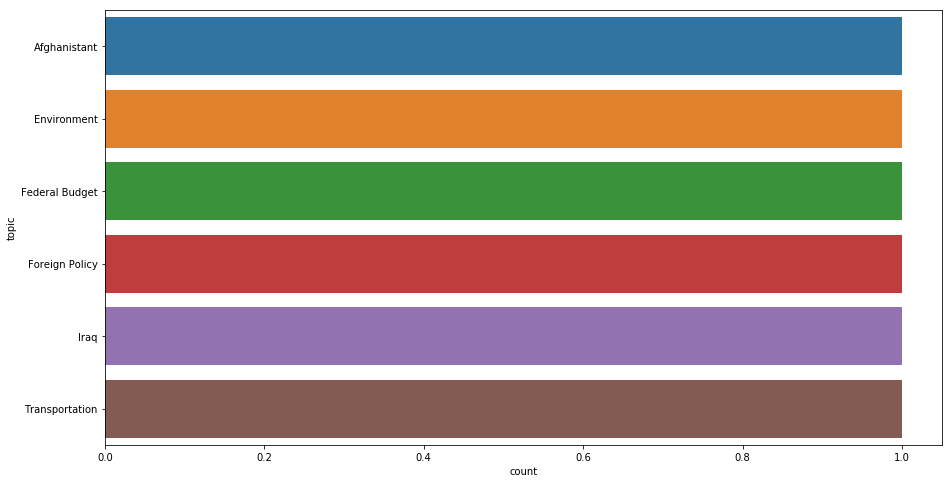

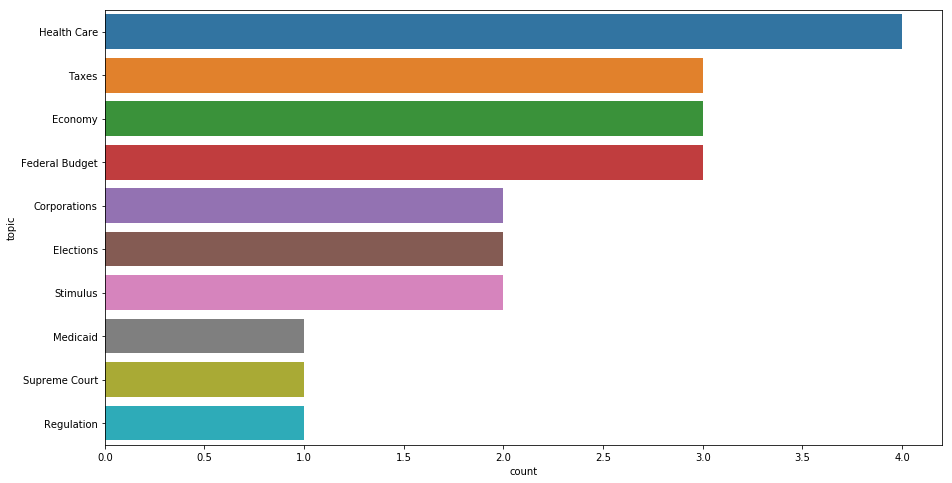

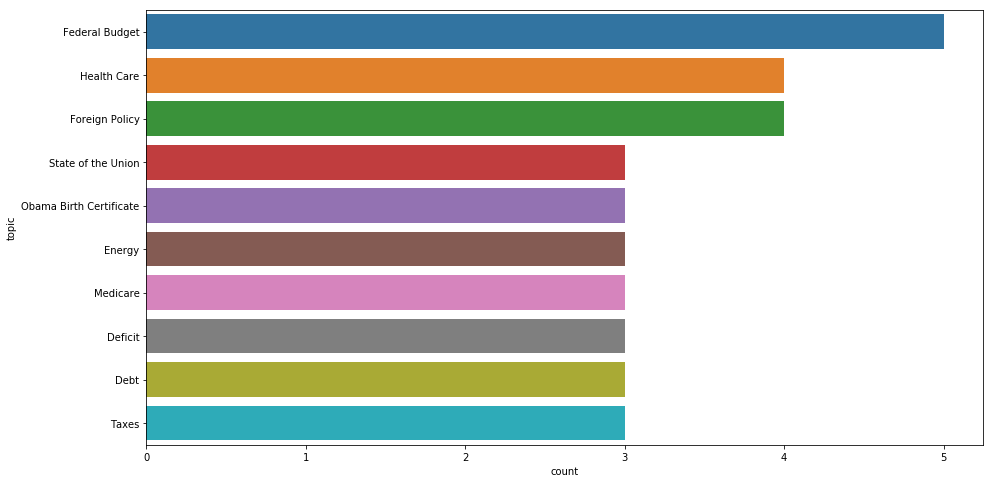

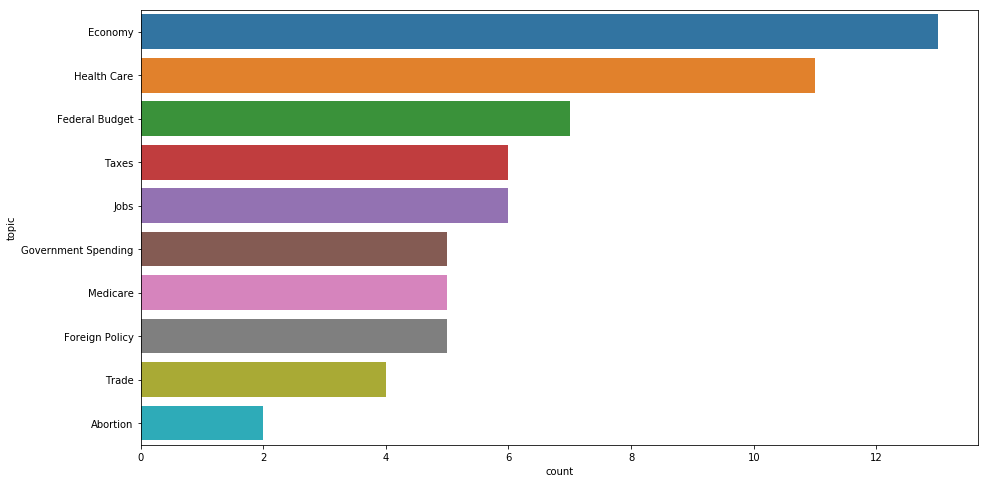

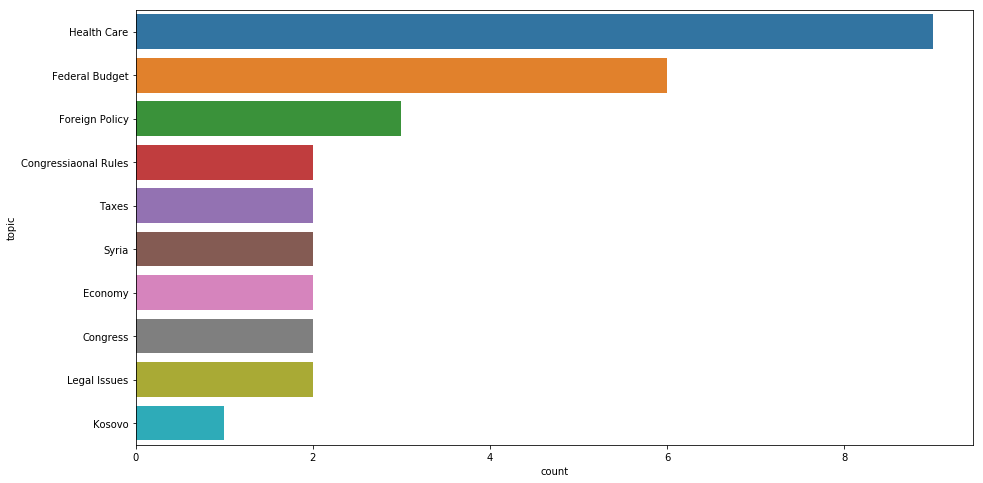

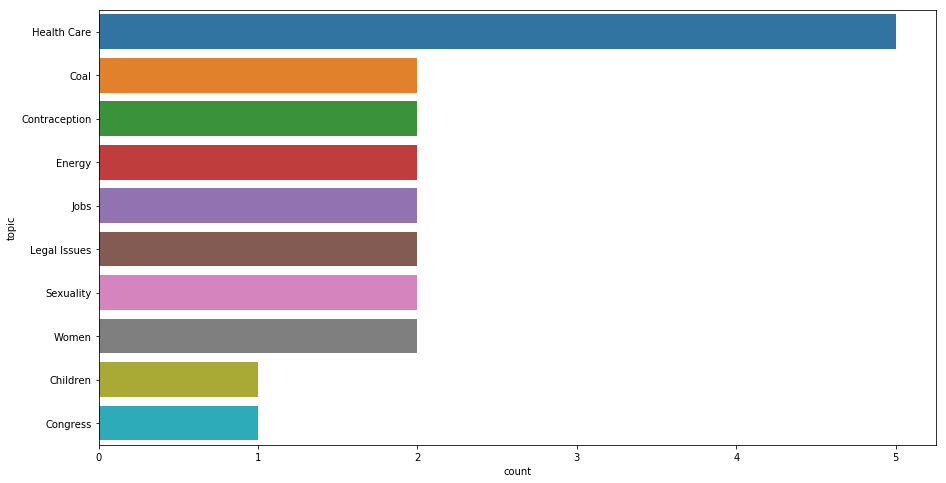

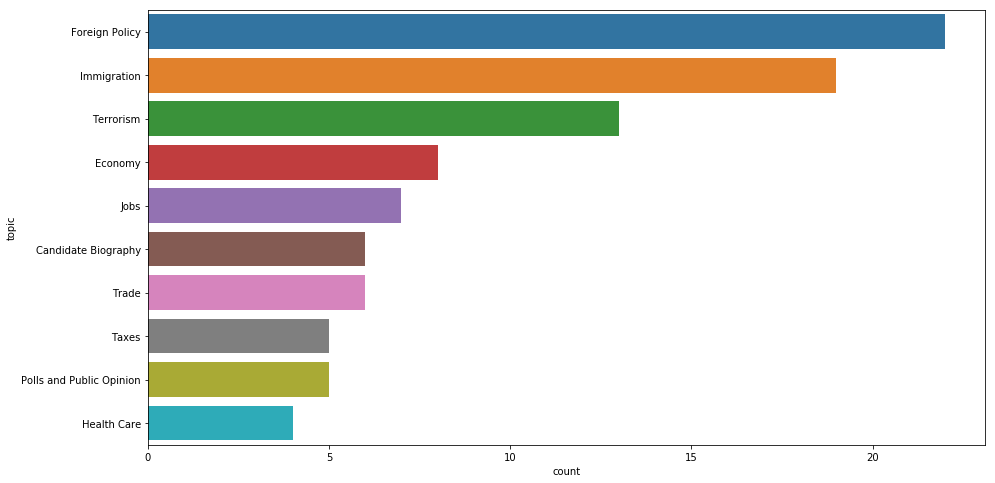

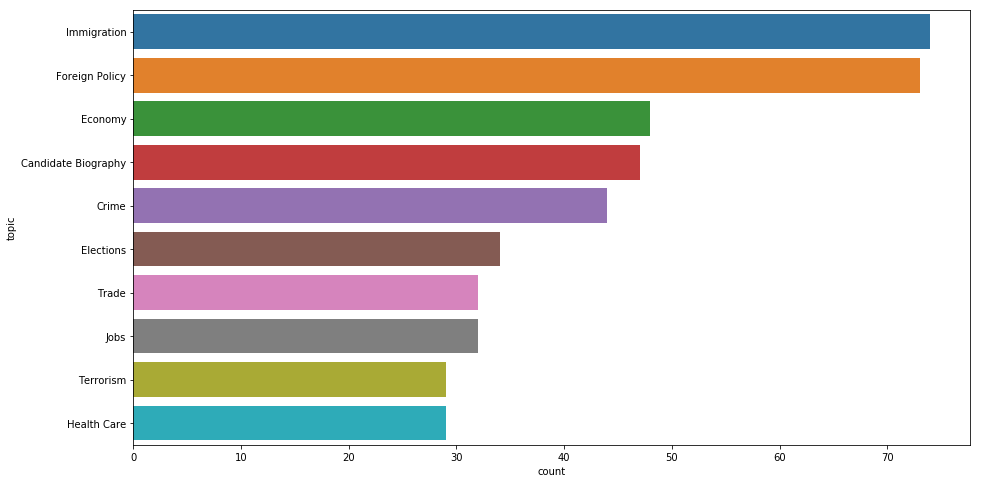

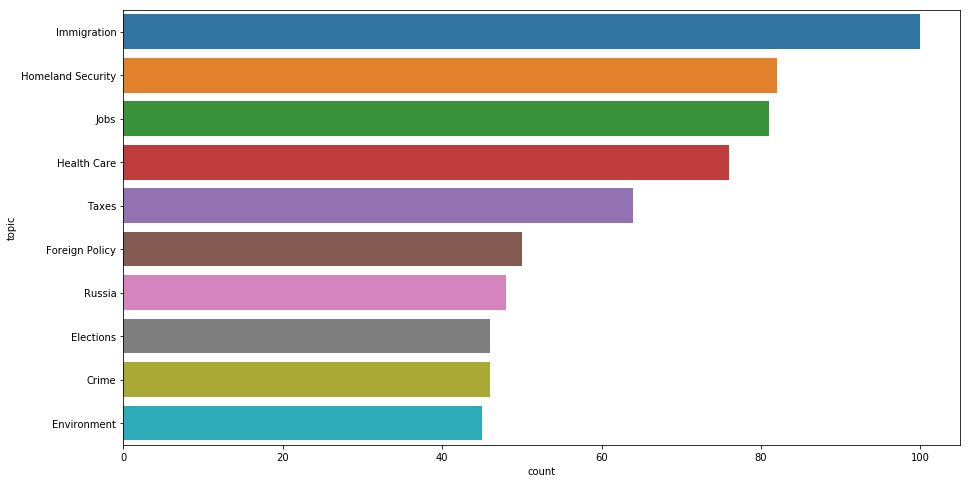

In [35]:
for i in range(2009, 2018):
    tmp = get_topics_in_period(news, str(i)+'-01-01', str(i)+'-12-31')
    print('Year: ', i)
    print_top_topics(tmp, 10)